# **Exercise 4**

## Decrypt a message

In [17]:
import numpy as np

Characters = np.array(["1", "2", "3", "4", "5", "6", "7", "8", "9", "0", "/", "-", "_", "%", "?", "\\", "*", ".", ":", "a", "b",
                      "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w",
                      "x", "y", "z", "!", "\"", "#", "$", "&", "+", "@", "|", "¨", "~"])

#for i, j in np.ndenumerate(Characters):
#    print(i,j)
#Lo implementé pero no supe para qué usarlo

def decrypt(code,key):
    cont = 0
    txt = []
    msg = ""
    for i in range(len(code)):
        for j in range(len(Characters)):
            if(cont >= len(key)):
                cont = 0
            if(Characters[j] == code[i]):
                txt.append(Characters[j-int(key[cont])])
                cont = cont + 1
    for k in range(len(txt)):
        msg = msg + str(txt[k])
    return msg

Key1 = list("48193293")

Code1 = list("l"+"\""+"uyvba%vixhjk#kyjv"+"\""+"htlrr"+"\""+"fwwalrq:kxvgvrr"+"\""
            +"bwdeaoejp!dvxumw_vhvxgs!_lroyxxidrrpjoi!-vdu#hv:3aocvehi-udokgeb3?brwj")

link = decrypt(Code1,Key1)
print(link)

https://raw.githubusercontent.com/josemontanac/laboratorio-metodos-computacionales/master/2/lambda/lambda_26.png


## Filters

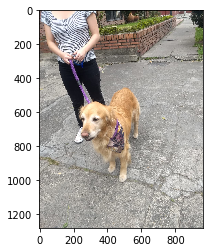

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = np.array(mpimg.imread("lambda_26.png", format='rbg'))
imgplot = plt.imshow(img)
plt.show()

In [19]:
print('The maximum value is ' + str(np.max(img)))
print('The manimum value is ' + str(np.min(img)))

The maximum value is 255
The manimum value is 0


The minimun and maximum values have sense cause are on the expected range of a .rgb image.

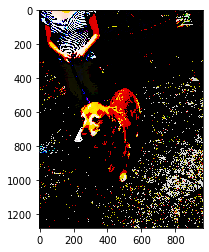

In [20]:
imgCopy1 = np.copy(img)

def more20less200 (img3d):
    for i in range(np.shape(img3d)[0]):
        for j in range(np.shape(img3d)[1]):
            for k in range(np.shape(img3d)[2]):
                if(img3d[i,j,k] >= 20 and img3d[i,j,k] <= 200):
                    img3d[i,j,k] = 0
    return img3d

filter1 = more20less200(imgCopy1)

imgplot = plt.imshow(filter1)
plt.show()

The image change a lot because we are putting away all the intermediate colors, letting just the very high and low frencuecies.

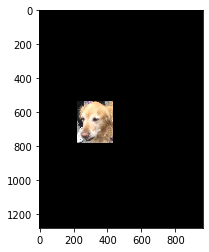

In [21]:
imgCopy2 = np.copy(img)

imgCopy2[:,0:220,:] = 0
imgCopy2[:,435:,:] = 0
imgCopy2[0:535,:,:] = 0
imgCopy2[780:,:,:] = 0

imgplot = plt.imshow(imgCopy2)
plt.show()

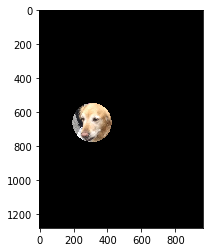

In [22]:
from scipy.spatial import distance

imgCopy3 = np.copy(img)

def CircularFilter(image, cx, cy, rad):
    for i in range(np.shape(image)[0]):
        for j in range(np.shape(image)[1]):
            if(distance.euclidean([i,j],[cx,cy])>rad):
                image[i,j] = 0
    return image

filter3 = CircularFilter(imgCopy3, 660, 310, 115)

imgplot = plt.imshow(filter3)
plt.show()

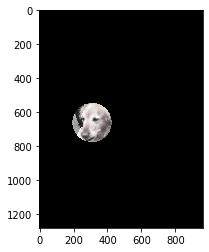

In [23]:
imgCopy4 = np.copy(img)

def BnW(image):
    for i in range(np.shape(image)[2]):
        image[:,:,i] = image[:,:,0]*0.299 + image[:,:,1]*0.587 + image[:,:,2]*0.114
    
    return image

filter4 = CircularFilter(BnW(imgCopy4), 660, 310, 115)

imgplot = plt.imshow(filter4)
plt.show()